### Analysis Conducted in This Notebook

1. **Selection of Job Websites**: Selected two job websites (hh.ru and getmatch.ru).
2. **Manual List of URLs**: Manually provided a list of URLs for job postings.
3. **Parsing Pages**: The parser extracts the most important information for the roles from each page.
4. **Extracting Top Skills**: Using spacy, top skills are extracted from the job descriptions.
5. **Generating Summaries**: Summaries are generated based on the TextRank algorithm.

In [1]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys

sys.path.append('/content/gdrive/MyDrive/ML/projects/job-market-analysis')

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

from utils import process_job_descriptions, extract_skills_from_files, concatenate_text_files, extract_summary, save_string_to_txt

#Analyze hh.ru jobs

In [41]:
hh_urls = ["https://hh.ru/vacancy/100305701?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/101119662?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100427927?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100381748?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/101091170?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/101078531?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/97118446?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/95069100?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99269846?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99855769?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100702680?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99692315?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99857300?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98609898?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99957956?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/96489765?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98477154?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100718009?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/94246862?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100576014?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/93057693?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99534608?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99071088?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100398183?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100397855?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/97976215?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/96203068?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/101100526?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/90484977?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100633302?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98902483?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100459100?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/94748036?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98822584?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100052307?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98118812?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/89014592?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100796461?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/97320426?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/93796870?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100427924?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/96267945?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/97960068?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100638455?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/92977082?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98331997?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99071111?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100341617?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100519013?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/93131001?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/98902687?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/92775857?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100384351?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/90408241?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/97151233?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100614027?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/92092463?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/99984387?query=data+engineer&hhtmFrom=vacancy_search_list",
        "https://hh.ru/vacancy/100519644?query=data+engineer&hhtmFrom=vacancy_search_list"
        ]

In [42]:
len(hh_urls)

59

In [43]:
start_keyword = "ознакомились с политикой конфиденциальности"
end_keyword = "Задайте вопрос работодателю"
description_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/hh/clean_descriptions"
summary_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/hh/summaries"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}

In [44]:
#process_job_descriptions(hh_urls, start_keyword, end_keyword, description_directory, summary_directory)

In [45]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/hh/clean_descriptions" | grep "^-" | wc -l

59


In [46]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/hh/summaries" | grep "^-" | wc -l

59


In [76]:
hh_skills = extract_skills_from_files(description_directory)

In [77]:
len(hh_skills)

933

In [78]:
#remove general words
excluded_skills = ["Data Engineer"]
hh_skills = [x for x in hh_skills if not x.islower() and all(skill not in x for skill in excluded_skills)]

#unify similar names
word_replacements = {"Clickhouse": "ClickHouse", "AirFlow": "Airflow", "Apache Airflow": "Airflow"}
hh_skills = [word_replacements.get(word, word) for word in hh_skills]

In [79]:
skill_counter = Counter(hh_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

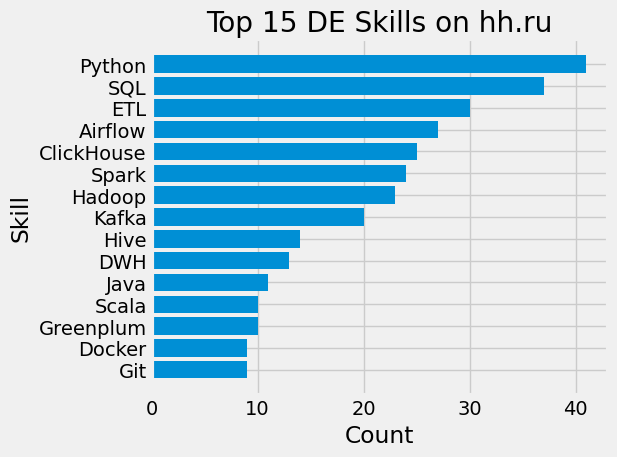

In [80]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on hh.ru')
plt.tight_layout()
#plt.savefig('top_hh.png', dpi = 600)
plt.show()

In [54]:
hh_summaries = concatenate_text_files(summary_directory)

In [55]:
hh_summary = extract_summary(hh_summaries, 5)

In [56]:
hh_summary

'Ключевые навыки SQL Python Мы ждем от вас: Уверенный опыт программирования на Python (не менее 2-х лет); Уверенные знания SQL и опыт работы с базами данных; Опыт работы с Apache Airflow; Оптимизация SQL запросов; Опыт работы с GreenPlum/СlickHouse; Понимания концепций построения хранилищ данных (DWH); Опыт работы со Spark. Чем предстоит заниматься: Поддержкой текущей инфраструктуры хранилища данных и формированием витрин данных Работать с базой данных (написание запросов в БД на SQL) Созданием аналитического слоя данных Работать с данными и построением ETL процессов Что мы ждем от вас: Опыт работы от 2-3х лет на позиции на стеке Microsoft: Microsoft SQL Server, SSIS, SSAS Знание Transact-SQL Опыт работы с ETL-инструментами (SSIS) Опыт оптимизации запросов Опыт взаимодействия с бизнесом/заказчиком напрямую (желательно) Будет плюсом: Владение Python Опыт администрирования БД Опыт работы с Power BI Опыт работы с API Что предлагает компания: Удаленную работу вне РФ Оплату по договору подр

In [57]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/hh", "hh_summary", hh_summary)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/hh/hh_summary.txt


#Analyze getmatch.ru jobs

In [14]:
gm_urls = ["https://getmatch.ru/vacancies/18654-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/6418-business-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/16143-business-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/19464-data-inzhener?s=offers",
           "https://getmatch.ru/vacancies/18789-dataops-engineer?s=offers",
           "https://getmatch.ru/vacancies/19424-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/14153-inzhener-dannykh-dwh?s=offers",
           "https://getmatch.ru/vacancies/19352-data-inzhener-ds?s=offers",
           "https://getmatch.ru/vacancies/19335-data-engineer-prognozirovanie?s=offers",
           "https://getmatch.ru/vacancies/17549-senior-data-engineer-logistika?s=offers",
           "https://getmatch.ru/vacancies/19220-senior-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/18817-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/17720-senior-data-engineer-set-prodazh?s=offers",
           "https://getmatch.ru/vacancies/17719-junior-data-engineer-hadoop?s=offers",
           "https://getmatch.ru/vacancies/18632-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/17296-data-engineer-upravlenie-assortimentom?s=offers",
           "https://getmatch.ru/vacancies/18628-inzhener-dannykh?s=offers",
           "https://getmatch.ru/vacancies/19143-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/16667-teamlead-data-engineering-platform?s=offers",
           "https://getmatch.ru/vacancies/17524-data-inzhener-platforma-dannykh?s=offers",
           "https://getmatch.ru/vacancies/18059-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/16643-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/19077-senior-big-data-engineer-sql-spark?s=offers",
           "https://getmatch.ru/vacancies/19070-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/13123-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/10977-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/18578-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/17768-data-engineer?s=offers",
           "https://getmatch.ru/vacancies/18635-data-engineer-crm?s=offers"
           ]

In [15]:
len(gm_urls)

29

In [83]:
start_keyword = "Поделиться Поделиться Telegram ВКонтакте Twitter Почта"
end_keyword = "Похожие вакансии"
description_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions"
summary_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}

In [18]:
#process_job_descriptions(gm_urls, start_keyword, end_keyword, description_directory, summary_directory)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions/18654.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries/18654.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions/6418.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries/6418.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions/16143.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries/16143.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions/19464.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries/19464.txt
Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean

In [19]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/clean_descriptions" | grep "^-" | wc -l

29


In [20]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/summaries" | grep "^-" | wc -l

29


In [84]:
gm_skills = extract_skills_from_files(description_directory)

In [85]:
len(gm_skills)

527

In [86]:
#remove general words
excluded_skills = ["Data", "Recruiter"]
gm_skills = [x for x in gm_skills if not x.islower() and all(skill not in x for skill in excluded_skills)]

#unify similar names
word_replacements = {"Clickhouse": "ClickHouse", "AirFlow": "Airflow", "Apache Airflow": "Airflow"}
gm_skills = [word_replacements.get(word, word) for word in gm_skills]

In [87]:
skill_counter = Counter(gm_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

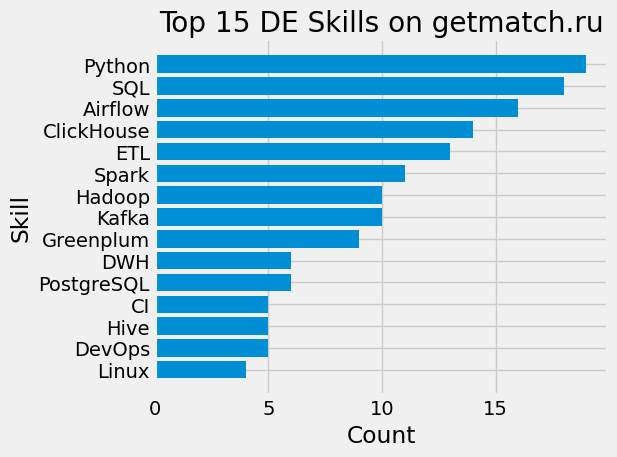

In [88]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on getmatch.ru')
plt.tight_layout()
#plt.savefig('top_gm.png', dpi = 600)
plt.show()

In [89]:
gm_summaries = concatenate_text_files(summary_directory)

In [90]:
gm_summary = extract_summary(gm_summaries, 5)

In [91]:
gm_summary

'Опыт работы с SQL, Spark, Python, CTL, ETL. Опыт работы с Airflow. Опыт работы с Airflow. Технологии/инструменты Python Hadoop Spark SQL Задачи Разработка и оптимизация программного кода на языке Python для обработки данных в Hadoop и Spark. Опыт работы с Apache (Spark, Hive, AirFlow).'

In [39]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/gm", "gm_summary", gm_summary)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/gm/gm_summary.txt


#Ru Market

We will now merge the information from both websites and analyze the entire data.

In [95]:
ru_skills = hh_skills + gm_skills

In [96]:
len(ru_skills)

1333

In [97]:
skill_counter = Counter(ru_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

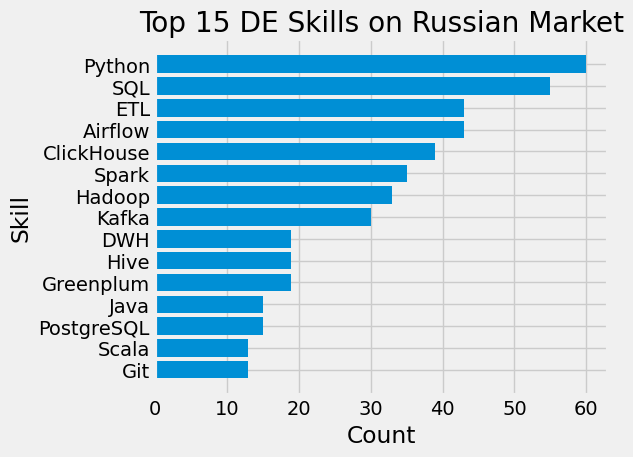

In [105]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on Russian Market')
plt.tight_layout()
#plt.savefig('top_ru.png', dpi = 600)
plt.show()

In [104]:
ru_summaries = hh_summaries + ' ' + gm_summaries

In [107]:
ru_summary = extract_summary(ru_summaries, 5)

In [108]:
ru_summary

'Ключевые навыки SQL Python Мы ждем от вас: Уверенный опыт программирования на Python (не менее 2-х лет); Уверенные знания SQL и опыт работы с базами данных; Опыт работы с Apache Airflow; Оптимизация SQL запросов; Опыт работы с GreenPlum/СlickHouse; Понимания концепций построения хранилищ данных (DWH); Опыт работы со Spark. Чем предстоит заниматься: проектировать и собирать витрины данных по разработанному ТЗ проектировать, разрабатывать и поддерживать ETL-процессы для загрузки данных из/в Data Lake писать документацию - комментировать код работать с data-аналитиками для создания новых и оптимизации существующих витрин Добро пожаловать к нам в команду, если есть: есть опыт на позиции Data Engineer от 2,5 лет понимание основных операций ДБ и DWH опыт работы с Hadoop технологиями (Spark, Hive и тд) хорошее знание SQL, Python опыт работы с Azure/Yandex облачными платформами опыт работы с Airflow, Kafka будем плюсом Что мы предлагаем: Сотрудники компании – главная ценность Rubius. Чем пред

In [109]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/summaries", "ru_summary", ru_summary)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/summaries/ru_summary.txt


### Summary of Key Skills and Requirements for Data Engineering Roles in Russian Job Market

#### Programming Languages
- **Python**: Strong programming skills in Python are essential, with at least 2 years of experience. Familiarity with data structures and data processing libraries is highly valued.
- **Java**: Experience in developing with Java is beneficial, especially for building scalable and high-performance applications.
- **Scala**: Knowledge of Scala is a plus, particularly for working with big data frameworks like Apache Spark.

#### Databases and Query Languages
- **SQL**: Proficiency in SQL is crucial, including writing complex queries and optimizing them for performance. Experience with relational databases like Microsoft SQL Server, PostgreSQL, and distributed databases like Greenplum and ClickHouse is highly desirable.
- **ClickHouse and Greenplum**: Specific experience with these databases is valued for their use in data warehousing solutions.
- **Hive**: Familiarity with Apache Hive for querying and managing large datasets in Hadoop is beneficial.

#### Big Data Technologies
- **ETL (Extract, Transform, Load)**: Expertise in designing, developing, and maintaining ETL processes for data integration and transformation is required. Knowledge of ETL tools like SSIS is advantageous.
- **Apache Spark**: Experience with Spark for big data processing is essential, including batch and streaming data processing.
- **Hadoop**: Understanding of Hadoop ecosystems and technologies like Spark and Hive is important for managing and processing large datasets.
- **Kafka**: Proficiency with Apache Kafka for real-time data streaming and integration is necessary.

#### Data Pipelines and Workflow Orchestration
- **Airflow**: Experience with Apache Airflow for scheduling and monitoring workflows is critical for managing complex data pipelines.
- **ETL Processes**: Ability to design and optimize ETL processes for data loading into and out of Data Lakes and Data Warehouses.

#### Data Warehousing
- **DWH (Data Warehousing)**: Understanding of data warehousing concepts and experience in building and maintaining Data Warehouses is required.

#### Cloud Platforms
- **Azure/Yandex Cloud**: Experience with cloud platforms like Azure or Yandex is an advantage for developing and deploying scalable data solutions.
- **AWS**: Knowledge of Amazon Web Services (AWS) and its tools like Redshift, Glue, and S3 for data storage and processing is beneficial.

#### Version Control
- **Git**: Proficiency in using Git for version control and collaboration is expected.

#### Additional Skills and Requirements
- **Transact-SQL**: For roles involving Microsoft technologies, expertise in Transact-SQL is needed.
- **Data Governance and Compliance**: Knowledge of best practices in data governance and compliance is preferred.
- **Problem-Solving and Communication**: Strong problem-solving skills, critical thinking, and excellent communication abilities are important for effectively collaborating with teams and stakeholders.

### Conclusion
Data engineering roles require a blend of programming skills, proficiency in SQL and database management, expertise in big data technologies, and experience with ETL processes and workflow orchestration tools. An emphasis is placed on knowledge of cloud platforms and their associated technologies. These skills and requirements are crucial for building robust, scalable data infrastructures and enabling data-driven decision-making within organizations.